In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [114]:
# Load data
df = pd.read_csv("nhl_game_data/game_teams_stats.csv")
df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [115]:
# Change catergorical data to numerical
df['won_true'] = df['won'].astype(int)
# drop unnecessary columns
df.drop(['game_id'], axis=1, inplace=True)
df.drop(['team_id'], axis=1, inplace=True)
df.drop(['HoA'], axis=1, inplace=True)
df.drop(['won'], axis=1, inplace=True)
df.drop(['settled_in'], axis=1, inplace=True)
df.drop(['head_coach'], axis=1, inplace=True)
# normalize 
df['shots'] = (df['shots'] - df['shots'].mean()) / (df['shots'].max() - df['shots'].min())
df['hits'] = (df['hits'] - df['hits'].mean()) / (df['hits'].max() - df['hits'].min())
df['pim'] = (df['pim'] - df['pim'].mean()) / (df['pim'].max() - df['pim'].min())
df['powerPlayOpportunities'] = (df['powerPlayOpportunities'] - df['powerPlayOpportunities'].mean()) / (df['powerPlayOpportunities'].max() - df['powerPlayOpportunities'].min())
df['powerPlayGoals'] = (df['powerPlayGoals'] - df['powerPlayGoals'].mean()) / (df['powerPlayGoals'].max() - df['powerPlayGoals'].min())
df['giveaways'] = (df['giveaways'] - df['giveaways'].mean()) / (df['giveaways'].max() - df['giveaways'].min())
df['takeaways'] = (df['takeaways'] - df['takeaways'].mean()) / (df['takeaways'].max() - df['takeaways'].min())
df['faceOffWinPercentage'] = (df['faceOffWinPercentage'] - df['faceOffWinPercentage'].mean()) / (df['faceOffWinPercentage'].max() - df['faceOffWinPercentage'].min())
df.head()

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,won_true
0,3,-0.081415,0.094775,0.009968,-0.014944,0.067941,-0.087329,-0.073560,0.002587,0
1,4,0.103770,0.043493,-0.022819,0.235056,0.067941,0.087329,0.120885,-0.094187,1
2,4,0.085252,0.107595,0.009968,0.068389,-0.098726,0.015411,-0.018004,0.002587,1
3,1,-0.192526,0.005031,0.119258,0.151722,-0.098726,-0.015411,0.009773,-0.029671,0
4,3,-0.044378,0.056313,-0.033747,0.151722,0.067941,0.013699,-0.184671,-0.190961,0


In [116]:
# Saving X and y data 
y = df[df.columns[-1]] # last column
y.shape # only one list
# X is features
X = df[df.columns[0:9]]
X.shape # size is amount o features
print(X.head())
print(y.head())

   goals     shots      hits       pim  powerPlayOpportunities  \
0      3 -0.081415  0.094775  0.009968               -0.014944   
1      4  0.103770  0.043493 -0.022819                0.235056   
2      4  0.085252  0.107595  0.009968                0.068389   
3      1 -0.192526  0.005031  0.119258                0.151722   
4      3 -0.044378  0.056313 -0.033747                0.151722   

   powerPlayGoals  faceOffWinPercentage  giveaways  takeaways  
0        0.067941             -0.087329  -0.073560   0.002587  
1        0.067941              0.087329   0.120885  -0.094187  
2       -0.098726              0.015411  -0.018004   0.002587  
3       -0.098726             -0.015411   0.009773  -0.029671  
4        0.067941              0.013699  -0.184671  -0.190961  
0    0
1    1
2    1
3    0
4    0
Name: won_true, dtype: int32


In [117]:
# creating logistic regression model with just training set (whole set currently)
lr = LogisticRegression(C=100000, tol=.0000001, solver='newton-cg')
lr.fit(X, y)
lr.score(X, y)
# print out beta, coefficients
# lr.coef_

0.7778555186286514

In [118]:
# smf model to determine if features are insignificant. 

results = smf.logit('won_true ~ goals + shots + hits + pim + powerPlayOpportunities + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.464512
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                22868
Model:                          Logit   Df Residuals:                    22858
Method:                           MLE   Df Model:                            9
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3299
Time:                        14:45:06   Log-Likelihood:                -10622.
converged:                       True   LL-Null:                       -15851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.2013      0.047    -67.932      0.000      -3.294      -3.109
goals                      1.1986      0.017     71.354      0.000       1.166       1.232
shots                     -2.0037      0.140    -14.302      0.000      -2.278      -1.729
hits                      -0.2699      0.156     -1.732      0.083      -0.575       0.035
pim                       -4.7902      0.449    -10.667      0.000      -5.670      -3.910
powerPlayOpportunities     0.0102      0.149      0.068      0.946      -0.281       0.301
powerPlayGoals            -0.7999      0.165     -4.857      0.000      -1.123      -0.477
faceOffWinPercentage       0.5907      0.140      4.230      0.000       0.317       0.864
giveaways                 -0.7564      0.131     -5.789      0.000      -1.012      -0.500
takeaways                  1.2989      0.143      9.088      0.000       1.019       1.579
==========================================================================================
"""

Power Play Opportunities and Hits seem to be less significant to the dependant variable. Removing the variables seem best. 

In [119]:
# Drop insignificant features
df.drop(['powerPlayOpportunities'], axis=1, inplace=True)
df.drop(['hits'], axis=1, inplace=True)
# Remove these features from X
X = df[df.columns[0:7]]
X.head()

,goals,shots,pim,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,3,-0.081415,0.009968,0.067941,-0.087329,-0.073560,0.002587
1,4,0.103770,-0.022819,0.067941,0.087329,0.120885,-0.094187
2,4,0.085252,0.009968,-0.098726,0.015411,-0.018004,0.002587
3,1,-0.192526,0.119258,-0.098726,-0.015411,0.009773,-0.029671
4,3,-0.044378,-0.033747,0.067941,0.013699,-0.184671,-0.190961


In [120]:
results = smf.logit('won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.464579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                22868
Model:                          Logit   Df Residuals:                    22860
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3298
Time:                        14:45:06   Log-Likelihood:                -10624.
converged:                       True   LL-Null:                       -15851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.2051      0.047    -68.272      0.000      -3.297      -3.113
goals                    1.1998      0.017     71.707      0.000       1.167       1.233
shots                   -2.0076      0.138    -14.581      0.000      -2.277      -1.738
pim                     -4.8202      0.437    -11.028      0.000      -5.677      -3.963
powerPlayGoals          -0.7942      0.153     -5.186      0.000      -1.094      -0.494
faceOffWinPercentage     0.5937      0.140      4.252      0.000       0.320       0.867
giveaways               -0.7822      0.130     -6.030      0.000      -1.036      -0.528
takeaways                1.2936      0.143      9.062      0.000       1.014       1.573
========================================================================================
"""

In [121]:
# Refit the LR
lr = LogisticRegression(C=100000, tol=.0000001, solver='newton-cg')
lr.fit(X, y)
print(lr.score(X, y))
# Error rate
from sklearn.metrics import accuracy_score
lr_y_pred = lr.predict(X)
lr_a_score = accuracy_score(y, lr_y_pred)
lr_error_rate = 1 - lr_a_score
lr_error_rate

0.7775494140283365


0.22245058597166345

In [122]:
# Split data set into training, validation and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=3)
X_train.shape, X_valid.shape, X_test.shape

((12863, 7), (4288, 7), (5717, 7))

In [124]:
# Join the X and y of training set, validation set, and test set
df_train = X_train.join(y_train)
df_valid = X_valid.join(y_valid)
df_test = X_test.join(y_test)

# Set new model with training set using statsmodel
results_train = smf.logit('won_true ~ goals + shots + pim + powerPlayGoals + faceOffWinPercentage + giveaways + takeaways', data = df_train).fit()
results_train.summary()

Optimization terminated successfully.
         Current function value: 0.466941
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               won_true   No. Observations:                12863
Model:                          Logit   Df Residuals:                    12855
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.3263
Time:                        14:45:06   Log-Likelihood:                -6006.3
converged:                       True   LL-Null:                       -8915.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.1731      0.062    -51.165      0.000      -3.295      -3.052
goals                    1.1843      0.022     53.646      0.000       1.141       1.228
shots                   -1.9115      0.183    -10.424      0.000      -2.271      -1.552
pim                     -4.2356      0.576     -7.360      0.000      -5.364      -3.108
powerPlayGoals          -0.8143      0.202     -4.022      0.000      -1.211      -0.417
faceOffWinPercentage     0.6611      0.187      3.530      0.000       0.294       1.028
giveaways               -0.6154      0.172     -3.573      0.000      -0.953      -0.278
takeaways                1.4036      0.189      7.413      0.000       1.033       1.775
========================================================================================
"""

In [125]:
# Logistic Regression model
lr = LogisticRegression(solver = 'newton-cg')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7797796046877733

In [126]:
# SVC model
smv = SVC()
smv.fit(X_train, y_train)
smv.score(X_test, y_test)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7771558509707889

In [127]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7582648242085009

In [138]:
# Testing with KFold
kf = KFold(n_splits=3)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

lr_scores = []
svm_scores = []
rf_scores = []

for df_train, df_test in kf.split(X):
    # Split data for each test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    
    lr_scores.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    svm_scores.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    rf_scores.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn

In [139]:
lr_scores

[0.7801294385167046, 0.7801294385167046, 0.7801294385167046]

In [140]:
svm_scores

[0.7771558509707889, 0.7771558509707889, 0.7771558509707889]

In [141]:
rf_scores

[0.7500437292286164, 0.7479447262550288, 0.7419975511631974]

In [135]:
# Test using shortcut
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(), X, y, cv=3)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.76941238, 0.78037261, 0.77984781])

In [136]:
cross_val_score(RandomForestClassifier(), X, y, cv=3)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.74724554, 0.75098399, 0.750328  ])

In [137]:
cross_val_score(SVC(), X, y, cv=3)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.76770724, 0.77604303, 0.77604303])

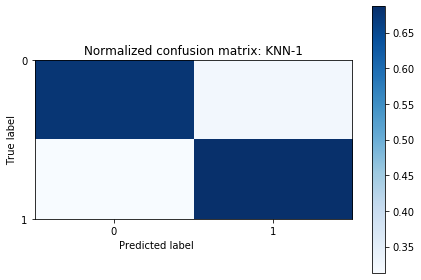

Predicted     0     1
True                 
0          1918   917
1           903  1979
   Precision
0   0.679901
1   0.683356


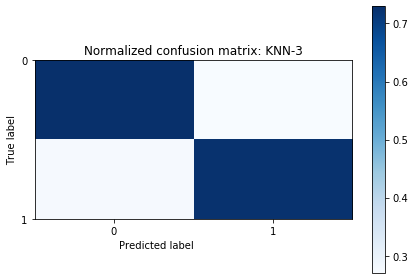

Predicted     0     1
True                 
0          2068   767
1           792  2090
   Precision
0   0.723077
1   0.731537


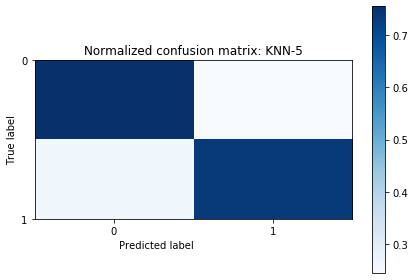

Predicted     0     1
True                 
0          2140   695
1           761  2121
   Precision
0   0.737677
1   0.753196


In [198]:
def KNN(X_train, y_train, X_test, y_test, n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    return(pred, score, knn.classes_)

def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('Predicted label',rotation='horizontal', ha='right')
    plt.ylabel('True label')
    plt.show()

for k in [1,3,5]:
    pred, score, classes = KNN(X_train, y_train, X_test, y_test, k)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, classes, n_neighbors=k)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    cm_df.index.name = 'True'
    cm_df.columns.name = 'Predicted'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                       index=classes, columns=['Precision']))

From these results, it looks as though a LR model will be produce the best model.

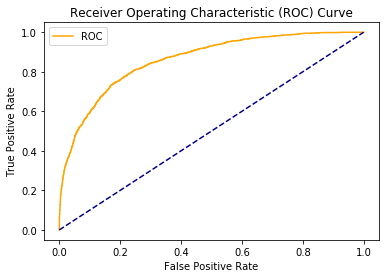

0.8605271177790261

In [146]:
# function for printing the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_probs = lr.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

In [147]:
# Confusion Matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2216,  619],
       [ 640, 2242]], dtype=int64)

In [148]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.776     0.782     0.779      2835
           1      0.784     0.778     0.781      2882

    accuracy                          0.780      5717
   macro avg      0.780     0.780     0.780      5717
weighted avg      0.780     0.780     0.780      5717



In [174]:
cross_val_score(LogisticRegression(), X, y, cv=3)

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.76941238, 0.78037261, 0.77984781])

In [176]:
cross_val_score(LogisticRegression(solver = "liblinear", class_weight='balanced', C=100000, tol=.0000001), X, y, cv=5)

array([0.76956712, 0.77372103, 0.78334062, 0.7783122 , 0.78368329])

In [194]:
# Updated Logistic Regression model
lr = LogisticRegression(solver = "liblinear", class_weight='balanced', C=100000, tol=.0000001)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7803043554311702

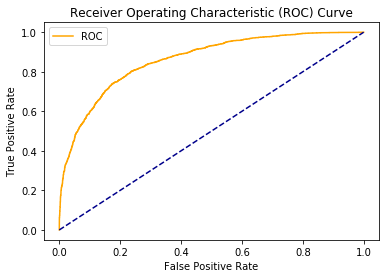

0.8608797290731134

In [199]:
# function for printing the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_probs = lr.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

In [200]:
# Confusion Matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2230,  605],
       [ 651, 2231]], dtype=int64)

In [201]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.774     0.787     0.780      2835
           1      0.787     0.774     0.780      2882

    accuracy                          0.780      5717
   macro avg      0.780     0.780     0.780      5717
weighted avg      0.780     0.780     0.780      5717

